In [1]:
import structuralanalysistoolbox as stbox

In [2]:
model = stbox.Model(name="my-model")

In [3]:
model.import_mesh(r'C:\Users\yigit\StructuralAnalysisToolbox\examples\meshes\cantilevier_beam.cdb')
model.add_material("Linear Steel", "MESH")

model.add_pilot_node(name="Force_Node", x=-15, y=50 ,z=-300)
model.add_pilot_node(name="Fixed", x=0, y=0, z=0)

model.add_force_dist_surf_constraint(pilot_node="Force_Node", contact_nodes="LOADING_NODES")
model.add_force_dist_surf_constraint(pilot_node="Fixed", contact_nodes="NS_FIX")

load_step_1 = model.add_loadstep(name="LS-1")
load_step_1.force("Force_Node", -5000, "Y")
load_step_1.force("Force_Node", 8000, "X")
load_step_1.displacement("Fixed", 0, "ALL")
load_step_1.output("ALL")
load_step_1.restart(frequency="LAST") # default
#model.solve()

In [4]:
# To check existent restart points at the current model directory
#mapdl = model._start()
#mapdl.slashsolu()
#mapdl.rescontrol(action="FILE_SUMMARY")
#mapdl.exit()

In [5]:
load_step_2 = model.add_loadstep(name="LS-2")
load_step_2.pressure("LOADING_NODES_2", 100, "Y")
load_step_2.force("Force_Node", 4000, "Y", operation="ADD")
load_step_2.output("ALL")
model.bc_history()
#model.solve(status="RESTART", step=1, substep=11)

,LS-1,LS-2
FORCE : Force_Node,Y : -5000,Y : 4000
FORCE : Force_Node,X : 8000,None
DISPLACEMENT : Fixed,ALL : 0,None
PRESS : LOADING_NODES_2,None,Y : 100


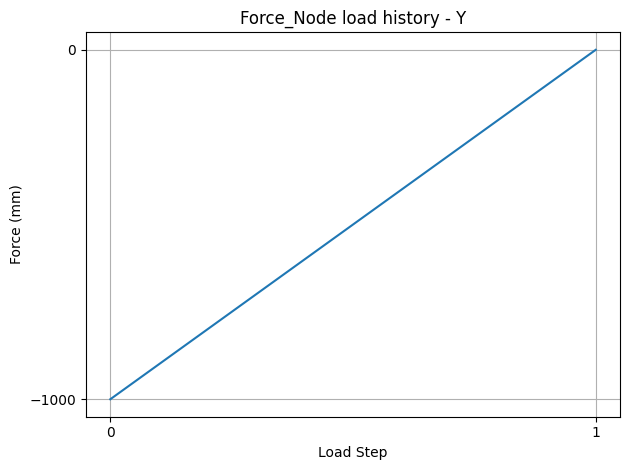

In [7]:
model.plot_load_history("Force_Node", "Force", "Y")

In [ ]:
load_step_2.force("Force_Node", 8000, "Y", operation="ADD")
model.bc_history()

In [ ]:
model.solve(status="RESTART", step=1, substep=11)

In [ ]:
solution = model.solution()

In [ ]:
disp = solution.displacement()
disp.animate(deform=True)